In [1]:
#Import some packages to use
import cv2 as cv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline 

import random
import os, shutil
import gc   #Gabage collector for cleaning deleted data from memory

train_dir = './train/train'
train_resize_dir = './train/resize_300_train'
#train_dir_cats = './kaggle_dogcat/train/cats'
test_dir = './test/test/'
test_resize_dir = './test/resize_300_test'

#get the train and label data
from sklearn.utils import shuffle
df = pd.read_csv('train.csv', dtype=str)  
df = shuffle(df)

X = df['filename'].values.tolist()
y = df['category']

# create resize folders
for q in range(42):
    q = "{:02d}".format(q)
    folder = train_resize_dir+ '/' + q
    if not os.path.exists(folder):
        os.makedirs(folder)
        print(folder)


train_imgs = ['./train/train/{}'.format(i) for i in os.listdir(train_dir) ]  #get dog images
#print (train_imgs)
#train_cats = ['./kaggle_dogcat/train/cats/{}'.format(i) for i in os.listdir(train_dir_cats) ]  #get cat images


path_list = os.listdir(test_dir)
path_list.sort()

test_imgs = ['./test/test/{}'.format(i) for i in path_list] #get test images
#print (test_imgs)
#random.shuffle(train_imgs)  # shuffle it randomly

#Clear list that are useless
del train_imgs
del test_imgs
gc.collect()   #collect garbage to save memory


10

In [2]:
#### create resize path
df.reset_index(drop=True, inplace=True)
df['filename_resize'] = train_resize_dir +'/'+ df['category'] +'/'+ df['filename']
df['filename_oringal'] = train_dir +'/'+ df['category'] +'/'+ df['filename']
#print(df['filename_oringal'])


In [3]:
df.head()

,filename,category,filename_resize,filename_oringal
0,8c64d78cede65c573456d3b75ff8fb62.jpg,39,./train/resize_300_train/39/8c64d78cede65c5734...,./train/train/39/8c64d78cede65c573456d3b75ff8f...
1,696fa16254faaa9c801d8b71a0894934.jpg,19,./train/resize_300_train/19/696fa16254faaa9c80...,./train/train/19/696fa16254faaa9c801d8b71a0894...
2,2f37fa230f808e31f4b99de56b2c5e4a.jpg,23,./train/resize_300_train/23/2f37fa230f808e31f4...,./train/train/23/2f37fa230f808e31f4b99de56b2c5...
3,5b55cacde057afc857196628f4fa8e82.jpg,32,./train/resize_300_train/32/5b55cacde057afc857...,./train/train/32/5b55cacde057afc857196628f4fa8...
4,ac904c5f182d36e0c8856f5b23457ea7.jpg,09,./train/resize_300_train/09/ac904c5f182d36e0c8...,./train/train/09/ac904c5f182d36e0c8856f5b23457...


In [1]:


### resize image
nrows = 300
ncolumns = 300
channels = 3  #change to 1 if you want to use grayscale image
i=0
for image in df['filename_oringal']:
        # 使用 OpenCV 讀取圖檔
        img_bgr = cv.imread(image)
        
        # 將 BGR 圖片轉為 RGB 圖片
        #img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
        img_rgb = cv.resize(img_bgr, (nrows,ncolumns))
        
        # 存圖不用轉顏色，印出來才要，否則會有色偏
        cv.imwrite(df['filename_resize'][i], img_rgb)
        #print (df['filename_resize'][i])
        i = i + 1
print (i)               
#link = train_dir+ '/' + y + '/' + X
df.to_csv('resize_300.csv',index=False)



NameError: name 'df' is not defined

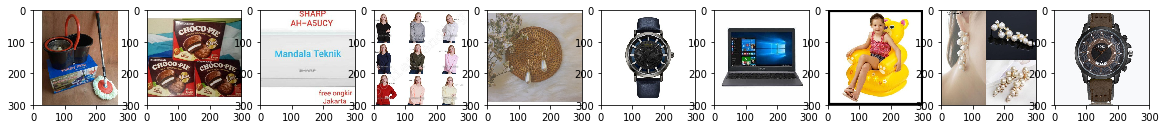

In [4]:
#Lets view some of the pics


plt.figure(figsize=(20,20))
columns = 10
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    img = mpimg.imread(df['filename_resize'][i])
    plt.imshow(img)

Text(0.5, 1.0, 'Labels for shopee')

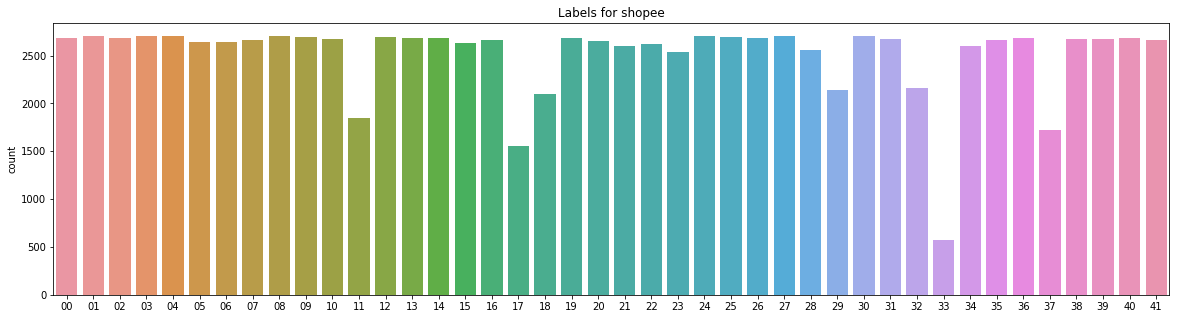

In [5]:
#del train_imgs
gc.collect()
#Convert list to numpy array
X = np.array(df['filename_resize'])
y = np.array(df['category'])

#Lets plot the label to be sure we just have two class
plt.figure(figsize=(20,5))
sns.countplot(y)
plt.title('Labels for shopee')

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

import matplotlib.pyplot as plt
from keras.utils import to_categorical

imgSize = 300
i=0
X_train = []
Y_train = []

def batch_generator(Train_df,
 batch_size,steps):
    idx=1
    while True: 
        yield load_data(Train_df,idx-1,batch_size)## Yields data
        if idx<steps:
            idx+=1
        else:
            idx=1

def load_data(Train_df,idx,batch_size):
    df = pd.read_csv(Train_df, skiprows=idx*batch_size, nrows=batch_size)
    x = df.iloc[:,1:]
    y = df.iloc[:,0] 
    return (np.array(x), np_utils.to_categorical(y))

output_dim = 10
input_dim = 784
batch_size = 256 
nb_epoch = 10
steps_per_epoch=np.ceil(103592/batch_size)
validation_steps=np.ceil(12186/batch_size)### Generator objects for train and validation
my_training_batch_generator = batch_generator('resize_300.csv', 256,steps_per_epoch)
my_validation_batch_generator = batch_generator('test.csv', 256,validation_steps)## Layer 1
model = Sequential()
model.add(Dense(50, input_dim=input_dim, activation='relu'))## Layer 2
model.add(Dense(output_dim, input_dim=50, activation='softmax'))##Compile model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
from keras import utils as np_utils
model.fit_generator(my_training_batch_generator,epochs=nb_epoch,
                    steps_per_epoch=steps_per_epoch, verbose=1, validation_data=my_validation_batch_generator, 
                    validation_steps=validation_steps)

Epoch 1/10


ValueError: invalid literal for int() with base 10: '13ccab997a3cc093dc4aeb407e7a07e9.jpg'

In [25]:
ddd = pd.read_csv('train.csv')
ddd[ddd['filename'] == '13ccab997a3cc093dc4aeb407e7a07e9.jpg']

,filename,category
42545,13ccab997a3cc093dc4aeb407e7a07e9.jpg,26


In [5]:
#Lets split the data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.20, random_state=2)

In [6]:
#Lets create the augmentation configuration
#This helps prevent overfitting, since we are using a small dataset
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
batch_size = 16
ntrain = len(X_train)
nval = len(X_val)


train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

In [7]:
from keras.applications import InceptionResNetV2
conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(imgSize,imgSize,3))
#conv_base.summary()

In [8]:
#Create the image generators
train_generator = train_datagen.flow(X_train, y_train,batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [9]:
#The training part
#train for 10 epochs with about 100 steps per epoch
from keras import layers
from keras import models

model = models.Sequential()
model.add(conv_base)
#model.add(layers.Flatten())
#model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes
#model.add(Conv2D(8, kernel_size=(3, 3),activation='relu',input_shape=(imgSize,imgSize,3)))
model.add(Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dense(42, activation='softmax'))
#Lets see our model
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 8, 8, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 98304)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               25166080  
_________________________________________________________________
dense_2 (Dense)              (None, 42)                10794     
Total params: 79,513,610
Trainable params: 79,453,066
Non-trainable params: 60,544
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=10,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
25/25 [==============================] - 127s 5s/step - loss: 15.4292 - acc: 0.0125 - val_loss: 15.9502 - val_acc: 0.0104
Epoch 2/10
25/25 [==============================] - 44s 2s/step - loss: 15.8360 - acc: 0.0175 - val_loss: 15.5424 - val_acc: 0.0357
Epoch 3/10
25/25 [==============================] - 43s 2s/step - loss: 15.8763 - acc: 0.0150 - val_loss: 15.7343 - val_acc: 0.0238
Epoch 4/10
25/25 [==============================] - 43s 2s/step - loss: 15.8763 - acc: 0.0150 - val_loss: 15.9262 - val_acc: 0.0119
Epoch 5/10
25/25 [==============================] - 43s 2s/step - loss: 15.8360 - acc: 0.0175 - val_loss: 15.9262 - val_acc: 0.0119
Epoch 6/10
25/25 [==============================] - 43s 2s/step - loss: 15.8360 - acc: 0.0175 - val_loss: 15.7343 - val_acc: 0.0238
Epoch 7/10
25/25 [==============================] - 43s 2s/step - loss: 15.8763 - acc: 0.0150 - val_loss: 15.

In [20]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(conv_base)
#model.add(layers.Flatten())
#model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes


model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),activation='relu',input_shape=(imgSize,imgSize,3)))
model.add(Flatten())
model.add(Dense(42, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
#model.summary()
model.fit(X_train, Y_train, epochs=10)


Epoch 1/10
105392/105392 [==============================] - 475s 5ms/step - loss: 3.4409 - acc: 0.1536
Epoch 2/10
105392/105392 [==============================] - 467s 4ms/step - loss: 1.8089 - acc: 0.5408
Epoch 3/10
105392/105392 [==============================] - 470s 4ms/step - loss: 0.6474 - acc: 0.8443
Epoch 4/10
105392/105392 [==============================] - 863s 8ms/step - loss: 0.2503 - acc: 0.9464
Epoch 5/10
105392/105392 [==============================] - 955s 9ms/step - loss: 0.1209 - acc: 0.9781
Epoch 6/10
105392/105392 [==============================] - 921s 9ms/step - loss: 0.0806 - acc: 0.9874
Epoch 7/10
105392/105392 [==============================] - 907s 9ms/step - loss: 0.0560 - acc: 0.9917
Epoch 8/10
105392/105392 [==============================] - 904s 9ms/step - loss: 0.0439 - acc: 0.9940
Epoch 9/10
105392/105392 [==============================] - 927s 9ms/step - loss: 0.0407 - acc: 0.9944
Epoch 10/10
105392/105392 [==============================] - 913s 9ms/ste

In [ ]:
df_test = pd.read_csv('./test.csv')
X_test = []
for imageName in df_test['filename']: 
    #print(test_dir + imageName)
    image = cv.imread(test_dir + imageName)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = cv.resize(image, (imgSize, imgSize))
    X_test.append(image)
X_test = np.array(X_test).astype('float16')/255

In [ ]:
res = model.predict(X_test, batch_size=32)
res = np.argmax(res, axis=1)
df_test['category'] = res
df_test['category'] = df.category.apply(lambda c: str(c).zfill(2))
df_test.to_csv('output.csv', index = False)

Now lets create our model.

In [99]:
#Using transfer learning InceptionResNetV2

from keras.applications import InceptionResNetV2

conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(imgSize,imgSize,3))





219062272/219055592 [==============================] - 26s 0us/step


KeyboardInterrupt: 

In [9]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

batch_normalization_196 (BatchN (None, 3, 3, 192)    576         conv2d_196[0][0]                 
__________________________________________________________________________________________________
batch_normalization_199 (BatchN (None, 3, 3, 256)    768         conv2d_199[0][0]                 
__________________________________________________________________________________________________
activation_196 (Activation)     (None, 3, 3, 192)    0           batch_normalization_196[0][0]    
__________________________________________________________________________________________________
activation_199 (Activation)     (None, 3, 3, 256)    0           batch_normalization_199[0][0]    
__________________________________________________________________________________________________
block8_9_mixed (Concatenate)    (None, 3, 3, 448)    0           activation_196[0][0]             
                                                                 activation_199[0][0]             
__________

In [10]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes

In [11]:
#Lets see our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


In [12]:
print('Number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('Number of trainable weights after freezing the conv base:', len(model.trainable_weights))


Number of trainable weights before freezing the conv base: 492
Number of trainable weights after freezing the conv base: 4


In [13]:
#We'll use the RMSprop optimizer with a learning rate of 0.0001
#We'll use binary_crossentropy loss because its a binary classification
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=2e-5), metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
#Create the image generators
train_generator = train_datagen.flow(X_train, y_train,batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

ValueError: could not convert string to float: '022b53c2083471d048a4c9b6e9dcf294.jpg'

In [37]:
#The training part
#train for 64 epochs with about 100 steps per epoch
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/64
100/100 [==============================] - 26s 263ms/step - loss: 0.3778 - acc: 0.8234 - val_loss: 0.4263 - val_acc: 0.9137
Epoch 2/64
100/100 [==============================] - 26s 261ms/step - loss: 0.3527 - acc: 0.8481 - val_loss: 0.2849 - val_acc: 0.9450
Epoch 3/64
100/100 [==============================] - 26s 261ms/step - loss: 0.3446 - acc: 0.8459 - val_loss: 0.2346 - val_acc: 0.9525
Epoch 4/64
100/100 [==============================] - 26s 261ms/step - loss: 0.3323 - acc: 0.8519 - val_loss: 0.2854 - val_acc: 0.9475
Epoch 5/64
100/100 [==============================] - 26s 261ms/step - loss: 0.3285 - acc: 0.8516 - val_loss: 0.3347 - val_acc: 0.9300
Epoch 6/64
100/100 [==============================] - 26s 261ms/step - loss: 0.3382 - acc: 0.8444 - val_loss: 0.2748 - val_acc: 0.9450
Epoch 7/64
100/100 [==============================] - 26s 261ms/step - loss: 0.3197 - acc: 0.8666 - val_loss: 0.5231 - val_acc: 0.9175
Epoch 8/64
100/100 [==============================] - 2

In [38]:
#Save the model
model.save_weights('model_wieghts_epoch64.h5')
model.save('model_keras_epoch64.h5')

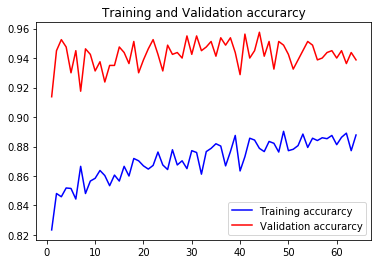

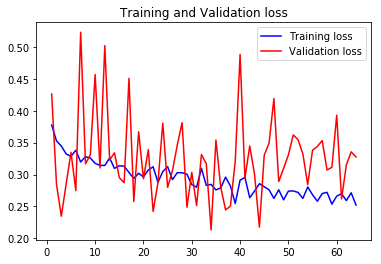

In [39]:
#lets plot the train and val curve
import matplotlib.pyplot as plt

#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


Let's create a function that makes our plot looks smoother and cleaner.

In [40]:
#Now lets predict on the first 10 Images of the test set

#test_imgs = ['./kaggle_dogcat/test/{}'.format(i) for i in os.listdir(test_dir).sort()] #get test images
X_test, y_test = read_and_process_image(test_imgs) #Y_test in this case will be empty.
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

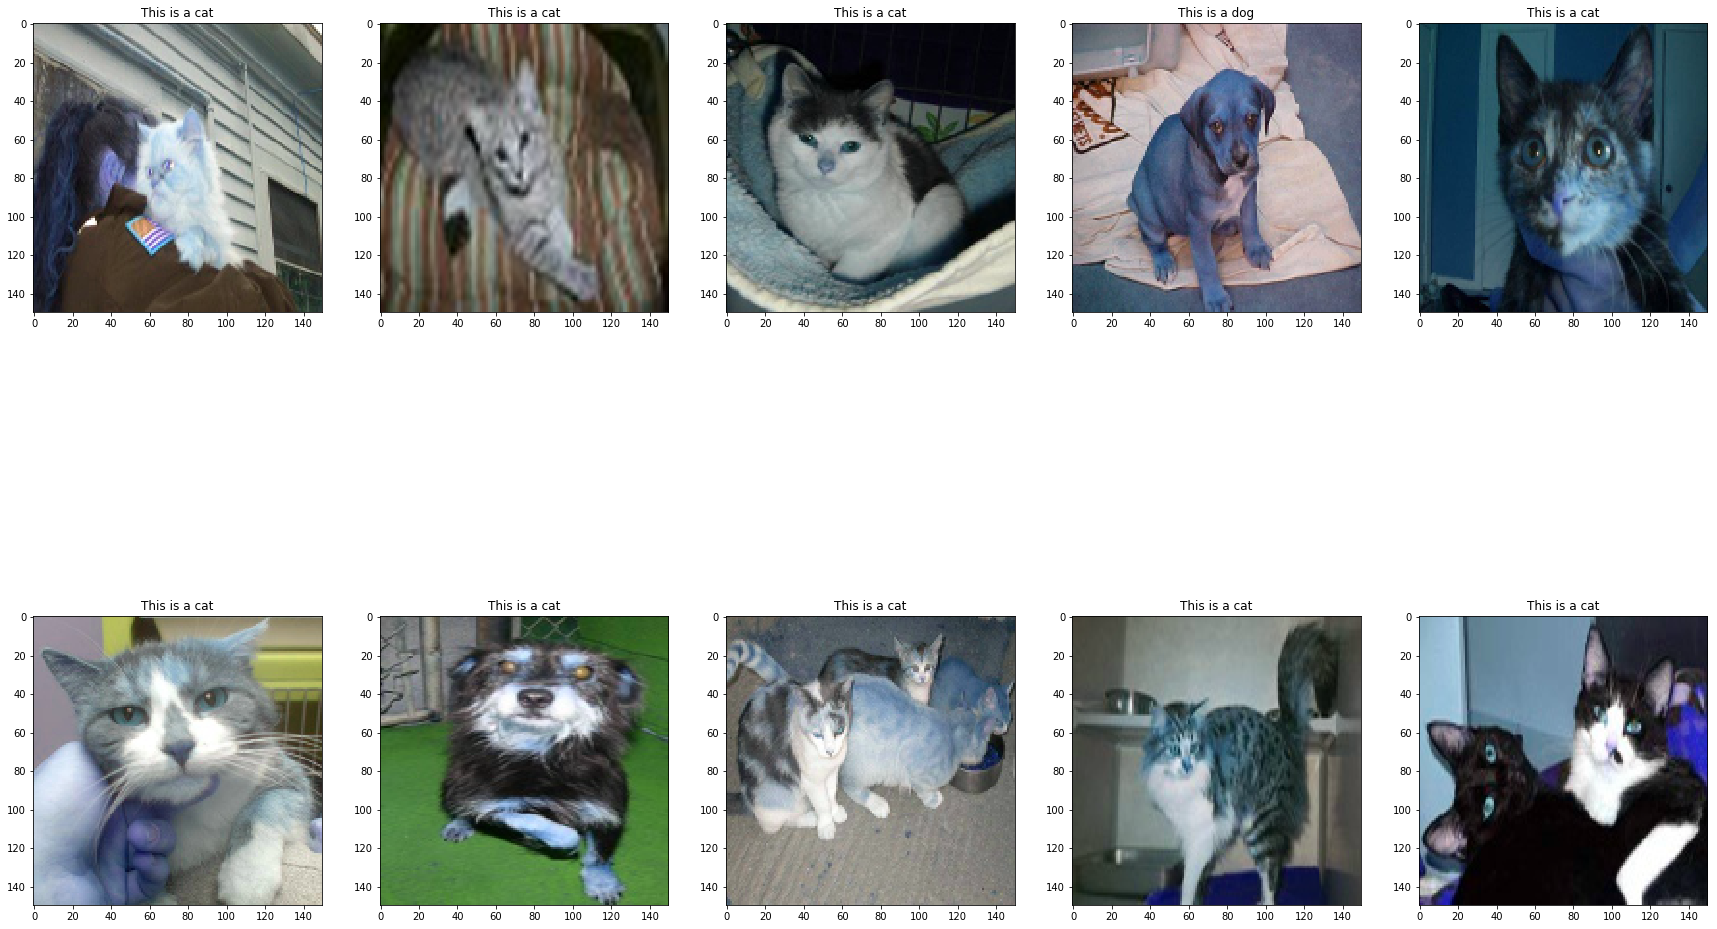

In [41]:
i = 0
columns = 5
text_labels = []
plt.figure(figsize=(30,20))
#pred = model.predict(x)
for batch in test_datagen.flow(x, batch_size=1,shuffle= False):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('cat')
    else:
        text_labels.append('dog')
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()

A [link](https://medium.com/@risingdeveloper/transfer-learning-on-image-classification-using-keras-and-kaggle-kernels-c76d3b030649) to my Medium post with full explanation of the code and transfer learning in general

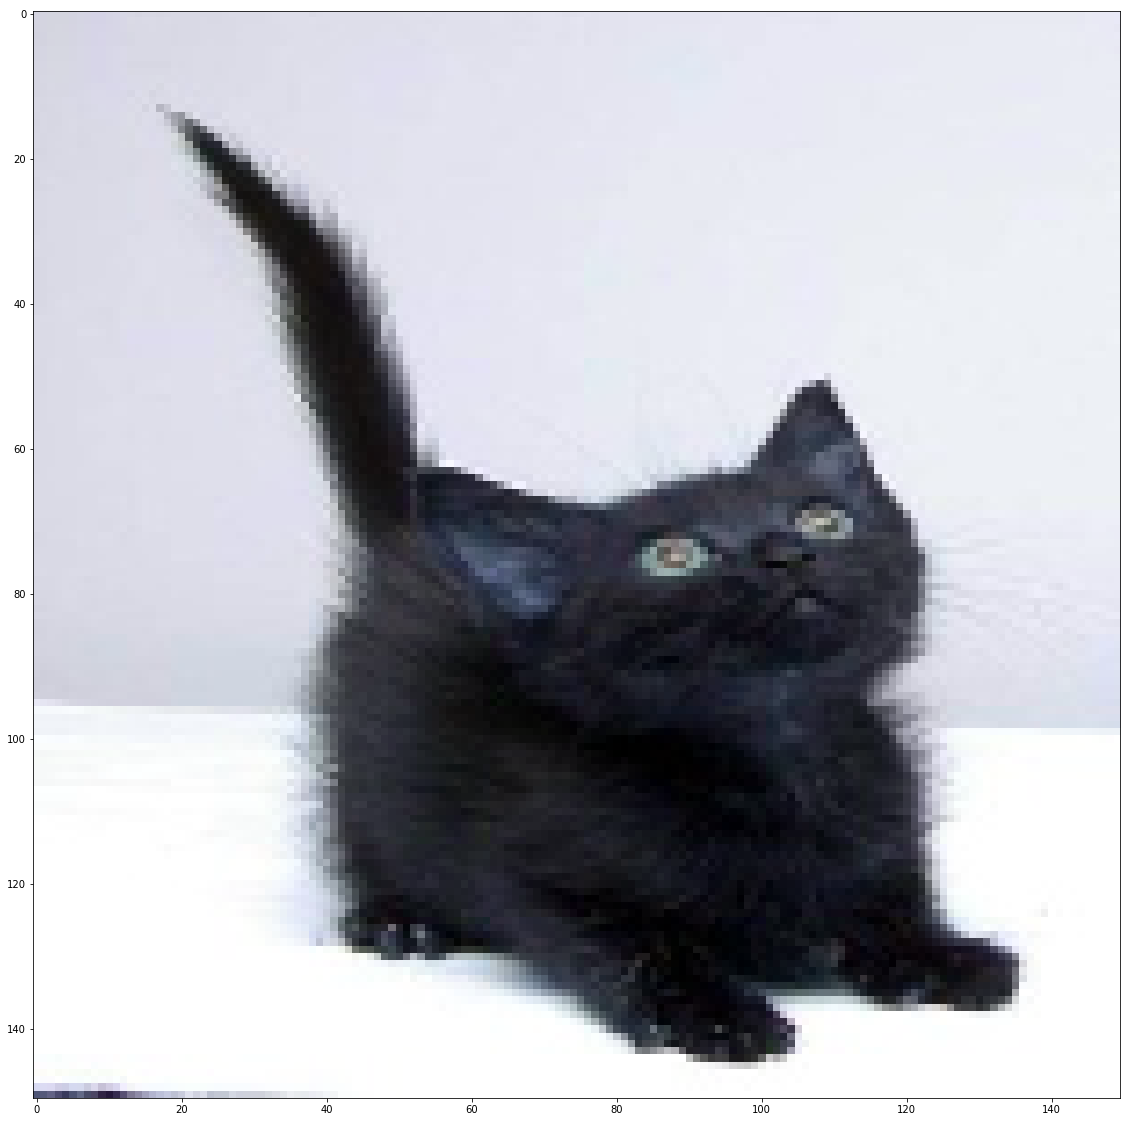

In [42]:
#Now lets predict on the first 10 Images of the test set
X_test, y_test = read_and_process_image(test_imgs) #Y_test in this case will be empty.
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

i = 0
text_labels = []
pred_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x, batch_size=1,shuffle= False):
    pred = model.predict(batch)
    pred_labels.append(pred)
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 400== 0:
        break
#plt.show()


#lets save our prediction and submit
counter = range(0, len(test_imgs))
#print(counter)
df_solution = pd.DataFrame({"ID": counter, "Predicted":list(pred_labels)})
cols = ['Predicted']

for col in cols:
    df_solution[col] = df_solution[col].map(lambda x: str(x).lstrip('[').rstrip(']')).astype(float)

df_solution.to_csv("submissiondogsVScats.csv", index = False)
